# Data Science I - Projeto final

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('titanic-data-6.csv')

---

# Preparar dados (Wrangle data)

Consultar o formato do dataframe, número de linhas e colunas.

In [3]:
df.shape

(891, 12)

Consultar as primeiro cinco linhas do dataframe.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Consultar informações como número de entradas, colunas e seus tipos de dados.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Renomear as colunas

In [6]:
df.rename(
    columns={
        'PassengerId': 'id_passageiro', 
        'Survived': 'sobreviveu', 
        'Pclass':'classe', 
        'Name':'nome', 
        'Sex':'sexo', 
        'Age':'idade', 
        'SibSp':'irmao_conjuge', 
        'Parch':'pais_filhos', 
        'Ticket':'ticket', 
        'Fare':'tarifa', 
        'Cabin':'cabine',
        'Embarked': 'embarcou'
    }, inplace=True)

Verificar a existência de linhas duplicadas.

In [7]:
df.duplicated().sum()

0

Verificar se há nomes repetidos

In [8]:
df['nome'].duplicated().sum()

0

Verificar variedade de registros únicos em sexo

In [9]:
df['sexo'].nunique()

2

In [10]:
df['sexo'].unique()

array(['male', 'female'], dtype=object)

Tradução de valores de 'sexo'

In [11]:
pt_sex = {'male': 'Masculino', 'female':'Feminino'}
df['sexo'] = df['sexo'].replace(pt_sex.keys(), pt_sex.values())

In [12]:
df['sexo'].unique()

array(['Masculino', 'Feminino'], dtype=object)

Verificar variedade de registros únicos em sobreviventes

In [13]:
df['sobreviveu'].nunique()

2

In [14]:
df['sobreviveu'].unique()

array([0, 1], dtype=int64)

Substituição dos valores de sobreviventes de 0, 1 para 'Não' e 'Sim', respectivamente

In [15]:
pt_survived = {'0':'Não', '1':'Sim'}
df['sobreviveu'] = df['sobreviveu'].astype(str).replace(pt_survived.keys(), pt_survived.values())

In [16]:
df['sobreviveu'].head()

0    Não
1    Sim
2    Sim
3    Sim
4    Não
Name: sobreviveu, dtype: object

Verificar se existe valores nulos

In [17]:
df.isnull().any()

id_passageiro    False
sobreviveu       False
classe           False
nome             False
sexo             False
idade             True
irmao_conjuge    False
pais_filhos      False
ticket           False
tarifa           False
cabine            True
embarcou          True
dtype: bool

Foram encontrados valores nulos nas colunas 'idade', 'cabine' e 'embarcou'

Preenchimento de valores nulos em idade com seu valor médio

In [18]:
df['idade'].fillna(round(df['idade'].mean()), inplace=True)

Verificar os registros nulos em local de embarque (Embarked)

In [19]:
df['embarcou'].isnull().sum()

2

In [20]:
df[df['embarcou'].isnull()]

,id_passageiro,sobreviveu,classe,nome,sexo,idade,irmao_conjuge,pais_filhos,ticket,tarifa,cabine,embarcou
61,62,Sim,1,"Icard, Miss. Amelie",Feminino,38.0,0,0,113572,80.0,B28,NaN
829,830,Sim,1,"Stone, Mrs. George Nelson (Martha Evelyn)",Feminino,62.0,0,0,113572,80.0,B28,NaN


Verificar se existe passageiros sem local de embarque marcados como não sobreviventes

In [21]:
df[df['sobreviveu'] == 'Não']['embarcou'].isnull().any().sum()

0

Por não existir passageiros sem local de embarque marcado como não sobrevivente todos serão removidos, considerando que estes não estavam a bordo

In [22]:
df.dropna(subset=['embarcou'], inplace=True)

Validar a remoção de passageiros sem local de embarque

In [23]:
df['embarcou'].isnull().any().sum()

0

In [24]:
df.shape

(889, 12)

Listar os valores únicos para a coluna referente ao local em que o passageiro embarcou

In [25]:
df['embarcou'].unique()

array(['S', 'C', 'Q'], dtype=object)

Substituição do nome dos locais de embarque abreviados pelo nome completo

In [26]:
embarked_places = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
df['embarcou'].replace(embarked_places.keys(), embarked_places.values(), inplace=True)

Categorização das idades dos passageiros

In [27]:
ages = [0, 15, 25, 65, np.inf]
ages_categories = ['Criança', 'Jovem', 'Adulto', 'Idoso']

df['categoria_idade'] = pd.cut(df['idade'], bins=ages, labels=ages_categories,right=True)

Validar o resultado da classificação de idade

In [28]:
df['categoria_idade'].unique()

[Jovem, Adulto, Criança, Idoso]
Categories (4, object): [Criança < Jovem < Adulto < Idoso]

---

# Explorar (Explore)

Matriz de gráficos de dispersão para ideias

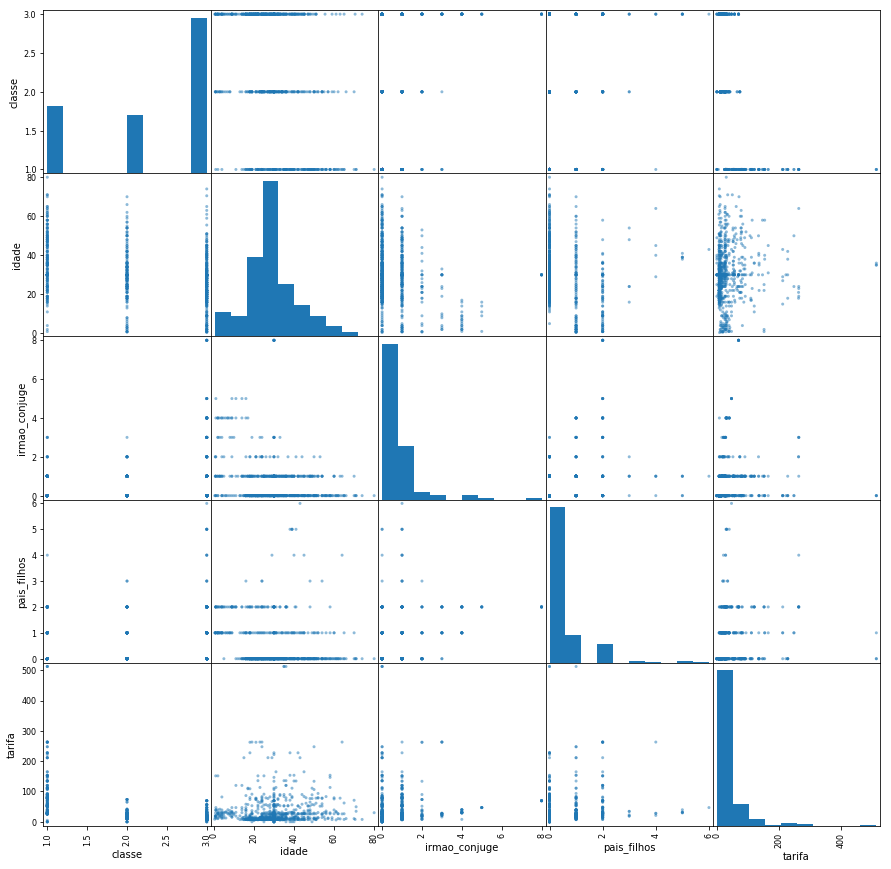

In [29]:
pd.plotting.scatter_matrix(df[['sobreviveu', 'classe', 'idade', 'irmao_conjuge', 'pais_filhos', 'tarifa']], figsize=(15,15));

In [30]:
df.head(15)

,id_passageiro,sobreviveu,classe,nome,sexo,idade,irmao_conjuge,pais_filhos,ticket,tarifa,cabine,embarcou,categoria_idade
0,1,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Jovem
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adulto
2,3,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adulto
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,113803,53.1000,C123,Southampton,Adulto
4,5,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,373450,8.0500,NaN,Southampton,Adulto
5,6,Não,3,"Moran, Mr. James",Masculino,30.0,0,0,330877,8.4583,NaN,Queenstown,Adulto
6,7,Não,1,"McCarthy, Mr. Timothy J",Masculino,54.0,0,0,17463,51.8625,E46,Southampton,Adulto
7,8,Não,3,"Palsson, Master. Gosta Leonard",Masculino,2.0,3,1,349909,21.0750,NaN,Southampton,Criança
8,9,Sim,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Feminino,27.0,0,2,347742,11.1333,NaN,Southampton,Adulto
9,10,Sim,2,"Nasser, Mrs. Nicholas (Adele Achem)",Feminino,14.0,1,0,237736,30.0708,NaN,Cherbourg,Criança


---

# Configurações e funções

Definir estilo padrão para os gráficos com Seaborn

In [31]:
sns.set_style('whitegrid')

Definição de função para criar plot figure com título

In [32]:
def create_figure(title):
    """
        Criar uma figure com titulo posicionado
        
        Args:
            title (String): Valor a ser preenchido no título do gráfico 
            
        Return:
            (plt.Figure) Retorna uma Figure para adicionar gráficos (Plots)
    """
    fig = plt.figure(title)
    fig.suptitle(title, fontsize='x-large', horizontalalignment='center', verticalalignment='bottom')
    plt.subplots_adjust(top=.9)
    plt.tight_layout()
    fig.set_figwidth(20)
    
    return fig


---

# Perguntas

## 1. Quantos sobreviveram?

Tabela de contagem e proporção de sobreviventes e mortes

In [33]:
def get_survivors():
    """
        Exibir tabela com contagem de sobreviventes e proporção
        
        Return (dataframe)
    """
    # Definição do dataframe de proporções
    df_survivors = df['sobreviveu'].value_counts().reset_index()
    df_survivors.rename(columns={'index': 'sobreviveu', 'sobreviveu': 'total'}, inplace=True)
    df_survivors['proporcao'] = round(df_survivors['total'].apply(lambda value: value / df_survivors['total'].sum()) * 100, 2)
    

    return df_survivors

In [34]:
df_survivors = get_survivors()
df_survivors[df_survivors['sobreviveu'] == 'Sim']

,sobreviveu,total,proporcao
1,Sim,340,38.25


Definição de função para gráfico de pie para a proporção de sobreviventes

In [35]:
def survivors_pie():
    """
        Exibir pie plot de sobreviventes
    """
    df_survivors = get_survivors()
    fig = create_figure('')
    
    # pie plot
    ax_pie = fig.add_subplot(121)
    
    values = df_survivors['proporcao'] * 100
    explode = np.full(df_survivors.shape[0], 0.05)
    labels = df_survivors['sobreviveu'].replace(['Sim','Não'],['Sobreviveu', 'Não sobreviveu'])

    ax_pie.axis('equal')
    ax_pie.pie(
        values, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        shadow=True,
        startangle=90,
    );
    
    ax_pie.set_title('SOBREVIVENTES')
    
    # table plot
    ax_table = fig.add_subplot(122)
    table = ax_table.table(
        cellText = df_survivors.values,
        colLabels = ['SOBREVIVEU', 'TOTAL', 'PROPORÇÃO'],
        loc='center',        
    )
    ax_table.axis('off')
    ax_table.set_title('TABELA DE SOBREVIVENTES')
    table.auto_set_font_size(False)
    table.set_fontsize(13)
    

## 2. Quantos morreram?

Seleção dos que não sobreviveram no dataframe criado na questão anterior

In [36]:
df_survivors[df_survivors['sobreviveu'] == 'Não']

,sobreviveu,total,proporcao
0,Não,549,61.75


## 3. Quantas crianças sobreviveram?

In [37]:
df.query('categoria_idade == "Criança"')['sobreviveu'].value_counts()

Sim    49
Não    34
Name: sobreviveu, dtype: int64

In [38]:
df.query('categoria_idade == "Criança"')['sobreviveu'].value_counts(normalize=True)

Sim    0.590361
Não    0.409639
Name: sobreviveu, dtype: float64

49 crianças sobreviveram

## 4. Quantas crianças morreram?

In [39]:
df.query('categoria_idade == "Criança"')['sobreviveu'].value_counts()

Sim    49
Não    34
Name: sobreviveu, dtype: int64

34 crianças morreram

## 5. Qual a idade média entre os sobreviventes?

Seleção dos sobreviventes e cáculo de idade média entre eles

In [40]:
df[df['sobreviveu'] == 'Sim']['idade'].mean()

28.469617647058822

Definição da função para imprimir a distribuição e média de idade

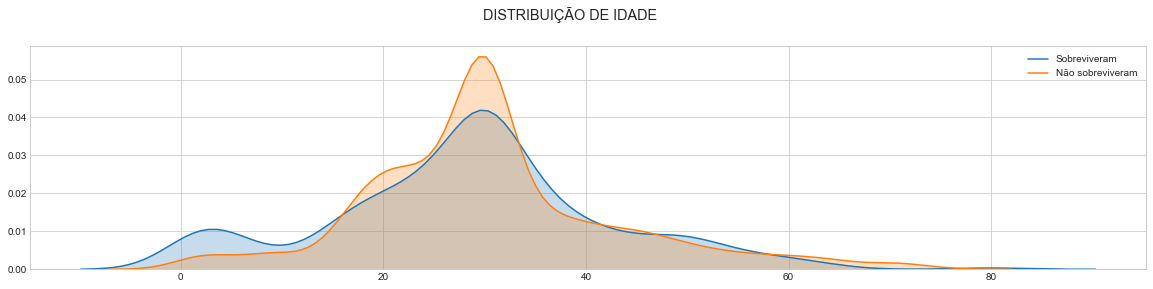

In [41]:
def age_dist_plot():
    """
        Gráfico de distribuição de idade
    """
    fig = create_figure('DISTRIBUIÇÃO DE IDADE')
    ax = fig.add_subplot(111)
    df_ages_surv = df[df['sobreviveu'] == 'Sim']['idade']
    df_ages_dead = df[df['sobreviveu'] == 'Não']['idade']
    
    sns.kdeplot(df_ages_surv, shade=True, label= 'Sobreviveram')
    sns.kdeplot(df_ages_dead, shade=True, label='Não sobreviveram')
    
age_dist_plot()

## 6. Qual a idade média entre os que não sobreviveram?

In [42]:
df.query('sobreviveu == "Não"')['idade'].mean()

30.483606557377048

## 7. Qual a relação dos sobreviventes com a classe de ingresso?

Pesquisa e normalização de sobreviventes por classe

In [43]:
df.groupby('classe')['sobreviveu'].value_counts(normalize=True)

classe  sobreviveu
1       Sim           0.626168
        Não           0.373832
2       Não           0.527174
        Sim           0.472826
3       Não           0.757637
        Sim           0.242363
Name: sobreviveu, dtype: float64

In [44]:
df.groupby('classe')['sobreviveu'].value_counts()

classe  sobreviveu
1       Sim           134
        Não            80
2       Não            97
        Sim            87
3       Não           372
        Sim           119
Name: sobreviveu, dtype: int64

A classe que apresentou maior número de sobreviventes foi a primeira com 62,6%.

## 8. Qual a relação dos sobreviventes com a classe e sexo?

In [45]:
df.groupby(['classe','sexo'])['sobreviveu'].value_counts(normalize=True)

classe  sexo       sobreviveu
1       Feminino   Sim           0.967391
                   Não           0.032609
        Masculino  Não           0.631148
                   Sim           0.368852
2       Feminino   Sim           0.921053
                   Não           0.078947
        Masculino  Não           0.842593
                   Sim           0.157407
3       Feminino   Não           0.500000
                   Sim           0.500000
        Masculino  Não           0.864553
                   Sim           0.135447
Name: sobreviveu, dtype: float64

As mulheres da primeira classe representaram a maior taxa de sobrevivência, 96,7% e a menor taxa de sobreviventes foi dos homens da terceira classe com apenas 13,5% de sobreviventes.

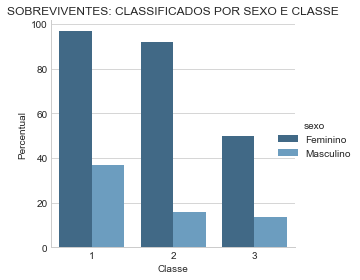

In [46]:
def most_survivors():
    """
        Exibir gráfico de sobreviventes por sexo e classe
    """
    df_surv = df.groupby(['classe','sexo'])['sobreviveu'].value_counts(normalize=True).to_frame()
    df_surv.columns = df_surv.columns.get_level_values(0)
    df_surv.rename(columns={'sobreviveu': 'percentual'}, inplace=True)
    df_surv['percentual'] = round(df_surv['percentual'] * 100, 2)
    df_surv.reset_index(inplace=True)
    
    ax = sns.factorplot(
        data = df_surv.query('sobreviveu == "Sim"'),
        x = 'classe',
        y = 'percentual',
        hue = 'sexo',
        kind = 'bar',
        palette = 'Blues_d',
    );
    
    plt.title('SOBREVIVENTES: CLASSIFICADOS POR SEXO E CLASSE')
    plt.ylabel('Percentual')
    plt.xlabel('Classe')
    plt.tight_layout()    
    
most_survivors()


## 9. Qual ponto de embarque recebeu mais passageiros?

Calcular o volume de embarque para cada local.

In [47]:
df['embarcou'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embarcou, dtype: int64

Exibir o ponto com maior frequência

In [48]:
df['embarcou'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: embarcou, dtype: object

O ponto de embarque que recebeu mais passageiros foi Southampton

## 10. Qual o sexo mais relevante entre os sobreviventes?

In [49]:
df.query('sobreviveu == "Sim"')['sexo'].value_counts()

Feminino     231
Masculino    109
Name: sexo, dtype: int64

In [50]:
df.query('sobreviveu == "Sim"')['sexo'].value_counts(normalize=True).reset_index()

,index,sexo
0,Feminino,0.679412
1,Masculino,0.320588


In [51]:
df.query('sobreviveu == "Sim" & sexo == "Feminino"')['classe'].value_counts()

1    89
3    72
2    70
Name: classe, dtype: int64

O gênero mais presente entre os sobreviventes é o feminino

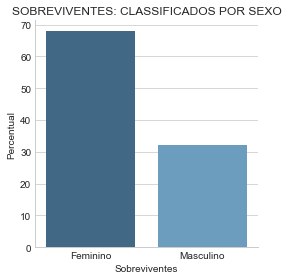

In [52]:
def sex_survivors_compare():
    """
        Exibir gráfico de comparação de sobreviventes do sexo masculino e feminino
    """
    columns = ['sexo', 'proporcao']
    df_surv = df.query('sobreviveu == "Sim"')['sexo'].value_counts(normalize=True).reset_index()
    df_surv.columns = columns
    df_surv['proporcao'] = round(df_surv['proporcao'] * 100, 2)
    
    ax = sns.factorplot(
        data = df_surv,
        x = 'sexo',
        y = 'proporcao',
        kind = 'bar',
        palette = 'Blues_d',
    );
    
    plt.title('SOBREVIVENTES: CLASSIFICADOS POR SEXO')
    plt.ylabel('Percentual')
    plt.xlabel('Sobreviventes')
    plt.tight_layout()

sex_survivors_compare()

## 11. Qual a relação entre as tarifas e os sobreviventes?

In [53]:
df[df['sobreviveu'] == 'Sim']['tarifa'].describe()

count    340.000000
mean      48.209498
std       66.748773
min        0.000000
25%       12.443750
50%       26.000000
75%       56.946900
max      512.329200
Name: tarifa, dtype: float64

In [54]:
df[df['sobreviveu'] == 'Não']['tarifa'].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: tarifa, dtype: float64

Os sobreviventes apresentam uma tarifa média superior aos que não sobreviveram.

## 12. Quantos bilhetes únicos existem?

In [55]:
df['ticket'].nunique()

680

## 13. Quantos bilhetes duplicados existem?

In [56]:
df['ticket'].duplicated().sum()

209

## 14. Quais as características dos passageiros com bilhetes duplicados?

In [57]:
df_duplicated = df[df['ticket'].duplicated(keep=False)]

In [58]:
df_duplicated.describe(include='all')

,id_passageiro,sobreviveu,classe,nome,sexo,idade,irmao_conjuge,pais_filhos,ticket,tarifa,cabine,embarcou,categoria_idade
count,342.000000,342,342.000000,342,342,342.000000,342.000000,342.000000,342,342.000000,113,342,342
unique,NaN,2,NaN,342,2,NaN,NaN,NaN,133,NaN,70,3,4
top,NaN,Sim,NaN,"Ringhini, Mr. Sante",Feminino,NaN,NaN,NaN,347082,NaN,B96 B98,Southampton,Adulto
freq,NaN,177,NaN,1,178,NaN,NaN,NaN,7,NaN,4,241,199
mean,444.730994,NaN,2.090643,NaN,NaN,26.917398,1.143275,0.865497,NaN,59.181396,NaN,NaN,NaN
std,257.503633,NaN,0.876861,NaN,NaN,14.449321,1.510452,1.058152,NaN,68.746840,NaN,NaN,NaN
min,4.000000,NaN,1.000000,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,235.000000,NaN,1.000000,NaN,NaN,17.250000,0.000000,0.000000,NaN,20.537500,NaN,NaN,NaN
50%,435.500000,NaN,2.000000,NaN,NaN,30.000000,1.000000,1.000000,NaN,31.275000,NaN,NaN,NaN
75%,670.750000,NaN,3.000000,NaN,NaN,35.000000,1.000000,1.000000,NaN,76.729200,NaN,NaN,NaN


Pela descrição dos dados de tickets duplicados é possivel constatar que:
- são no total 342 tickets duplicados,
- destes 342, 177 sobreviveram
- com maior frequência na terceira classe,
- 178 são do sexo feminino
- o ticket identificado como 1601 foi registrado sete vezes
- a cabine mais frequente foi a G6, registrada quatro vezes
- 241 embarcaram em Southampton
- 199 são adultos
- idade média de 26,9 anos

## 15. Qual a relação entre os sobreviventes e os pontos de embarque?

Seleção dos dados de passageiros agrupados por local

In [59]:
df_surv_embark = df.groupby(['embarcou'])

Relação de sobreviventes por local de embarque

In [60]:
df_surv_embark['sobreviveu'].value_counts(normalize=True)

embarcou     sobreviveu
Cherbourg    Sim           0.553571
             Não           0.446429
Queenstown   Não           0.610390
             Sim           0.389610
Southampton  Não           0.663043
             Sim           0.336957
Name: sobreviveu, dtype: float64

Contagem de sobreviventes por local de embarque

In [61]:
df_surv_embark['sobreviveu'].value_counts()

embarcou     sobreviveu
Cherbourg    Sim            93
             Não            75
Queenstown   Não            47
             Sim            30
Southampton  Não           427
             Sim           217
Name: sobreviveu, dtype: int64

Contagem de embarques por local

In [62]:
df_surv_embark['classe'].count()

embarcou
Cherbourg      168
Queenstown      77
Southampton    644
Name: classe, dtype: int64

Proporção de embarques por local

In [63]:
df['embarcou'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embarcou, dtype: float64

O local de embarque que apresentou a maior número de sobreviventes foi Southampton com 217 (33,6%) sobreviventes do total de 644 que embarcaram, entretanto, Cherbourg apresentou maior percentual de sobreviventes 55,3%, 93 passageiros do total de 168. Queenstown apresentou 38,9% (30) de sobreviventes do total de 77 embarques.

---

# Conclusão

Ao analisar a amostra de dados de passageiros do Titanic, foi possível chegar as seguintes conclusões.
- A primeira classe apresentou representou o maior percentual de sobreviventes, com 62,6%, contra 47,2% da segunda e 24,2% da terceira. Tal diferença pode apontar que houve alguma facilidade ou favorecimento no acesso aos botes salva vidas para os passageiros da primeira classe.
- Dentre os sobreviventes, 68% são mulheres e 32% homens
- O grupo de classe e sexo que apresentou maior taxa de sobreviventes foi o feminino da primeira classe, com a relação de 96,7%
- 59,0% das crianças a bordo foram salvas
- A idade média entre os sobreviventes era de 28,4 anos.
- O embarque de passageiros de Southampton representou 72,4%

# Limitações

Inicialmente ao avaliar o conjunto de dados foi detectado que haviam campos como idade, embarcou e cabine, não preenchidos e que potencialmente prejudicariam a análise. 
Assim, foram feitos alguns ajustes como:
- Campos de idade com valor nulo foram preenchidos com a média
- Foi efetuada uma breve análise sobre os passageiros que apresentavam o campo 'embarcou' como nulo e se haviam sobrevivido, assim, dado que o retorno foi positivo, estes foram removidos do conjunto de dados considerando que estes não embarcaram.

Valores abreviados em local de embarque (embarcou) foram substituídos pelo nome do local sem abreviação.

Foram aplicadas traduções nos nomes das colunas e nos valores dos campos sobreviveu e sexo para auxiliar na criação de legendas dos gráficos.

Foi criado um campo de categorização da idade dos passageiros com o objetivo de mapea-los facilmente e levantar informações a respeito de cada grupo.

---

# Apresentação

Mesmo após um século de seu naufrágio, que ocorreu em 1912, o Titanic é considerado um dos maiores desastres marítimos em tempos de paz. Sua história rendeu livros, filmes e diversos documentarios que buscam explorar e levar informações e curiosidades ao público.

Com mesmo sentido, esse projeto tem como objetivo explorar o conjunto de dados disponibilizado na etapa final do curso de Data Science I da Udacity através do [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv).

Diante disso, as primeiras perguntas vão em direção ao conhecimento da proporção do desastre, com o interesse de esclarecer o número de sobreviventes. 

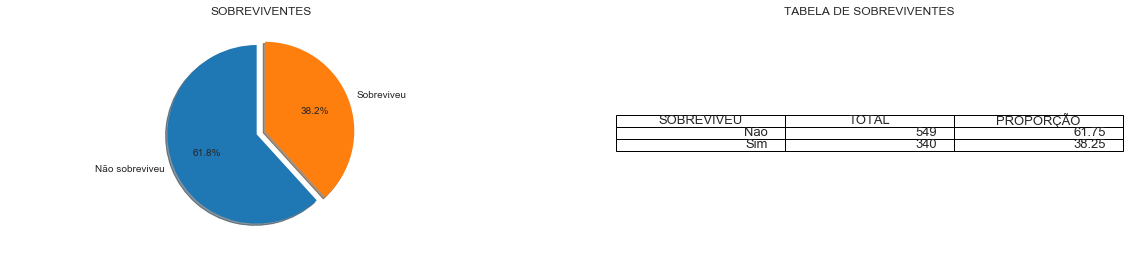

In [64]:
survivors_pie()

Como o gráfico acima e sua tabela correspondente demonstram, 38,25% dos passageiros sobreviveram e 61,75% morreram.

Os sobreviventes tinham idade média de 28,47 anos e é possivel indentificar que uma densidade levemente superior a 4% entre entre os 20 e 40 anos.

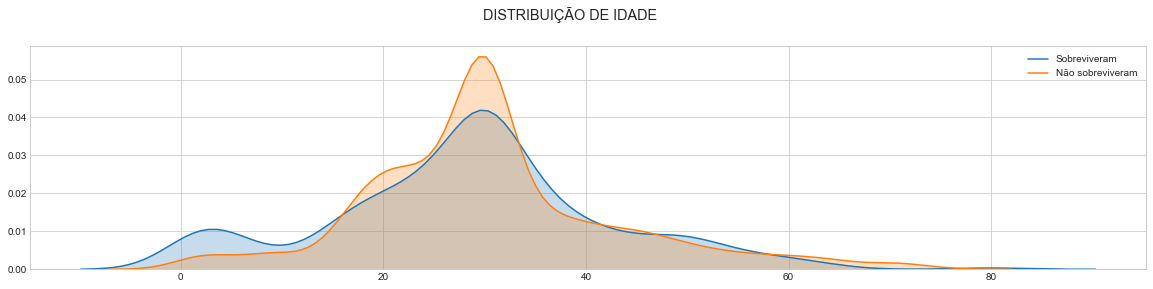

In [65]:
age_dist_plot()

Os passageiros que não sobreviveram apresentavem idade média de 30,48 anos, com densidade superior a 5% também entre os 20 e 40 anos.

Ao analisarmos a distinção de gênero entre os sobreviventes é possível notar como as mulheres é o sexo mais relevante, com 68% e os homens com 32%.

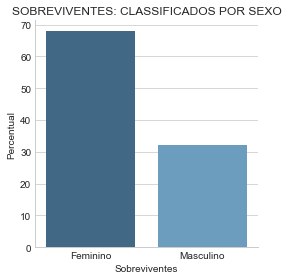

In [66]:
sex_survivors_compare()

O grupo de pessoas que apresentou maior percentual de sobreviventes foi no sexo feminino nas três classes, na primeira com 96,7%, segunda com 92,1% e terceira com 86,4%, enquanto que homens foram, 36,8% na primeira, 15,7% na segunda e 13,5% na terceira.

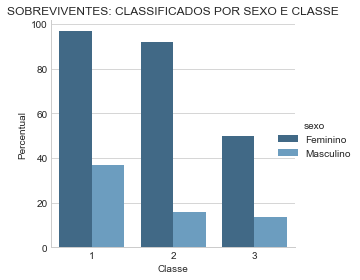

In [67]:
most_survivors()

Este é um projeto aberto, não tem como objetivo encontrar respostas definitivas e campos que não foram analisados ser explorados em novas análises e ou revistos.

---

# Consultas e referências

- [Seaborn API documentation](https://seaborn.pydata.org/api.html)
- [Stack Overflow: Seaborn](https://stackoverflow.com/questions/33524694/plotting-with-seaborn)
- [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Stack Overflow: Pandas](https://stackoverflow.com/questions/tagged/pandas)
- [Matplotlib documentation](https://matplotlib.org/contents.html)



